In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sp

plt.style.use('seaborn-notebook')


In [10]:
dietcomp=pd.read_csv("dietary-compositions-by-commodity-group.csv")
dietcomp.head()

,Entity,Code,Year,Other,Sugar,Oils & Fats,Meat,Dairy & Eggs,Fruits & Vegetables,Starchy Roots,Pulses,Cereals & Grains,Alcoholic Beverages
0,Afghanistan,AFG,2000.0,9.0,31.0,112.0,93.0,125.0,54.0,22.0,10.0,1334.0,0.0
1,Afghanistan,AFG,2001.0,5.0,30.0,96.0,79.0,82.0,62.0,21.0,17.0,1345.0,0.0
2,Afghanistan,AFG,2002.0,8.0,34.0,95.0,78.0,131.0,54.0,20.0,10.0,1396.0,0.0
3,Afghanistan,AFG,2003.0,10.0,42.0,105.0,73.0,119.0,52.0,31.0,9.0,1451.0,0.0
4,Afghanistan,AFG,2004.0,10.0,54.0,140.0,77.0,117.0,48.0,24.0,7.0,1490.0,0.0


In [11]:


dietcomp['Entity'].fillna(value="Others", inplace=True)
dietcomp['Other'].fillna(value="Unavailable", inplace=True)
dietcomp['Sugar '].fillna(value="Unavailable", inplace=True)
dietcomp['Oils & Fats '].fillna(value="Unavailable", inplace=True)
dietcomp['Meat '].fillna(value="Unavailable", inplace=True)
dietcomp['Dairy & Eggs '].fillna(value="Unavailable", inplace=True)
dietcomp['Fruits & Vegetables '].fillna(value="Unavailable", inplace=True)
dietcomp['Starchy Roots '].fillna(value="Unavailable", inplace=True)
dietcomp['Pulses'].fillna(value="Unavailable", inplace=True)
dietcomp['Cereals & Grains '].fillna(value="Unavailable", inplace=True)
dietcomp['Alcoholic Beverages '].fillna(value="Unavailable", inplace=True)

dietcomp.isnull().sum()

Entity                     0
Code                     209
Year                    5792
Other                      0
Sugar                      0
Oils & Fats                0
Meat                       0
Dairy & Eggs               0
Fruits & Vegetables        0
Starchy Roots              0
Pulses                     0
Cereals & Grains           0
Alcoholic Beverages        0
dtype: int64

In [12]:
diet = dietcomp.dropna()
diet.isnull().sum()

Entity                  0
Code                    0
Year                    0
Other                   0
Sugar                   0
Oils & Fats             0
Meat                    0
Dairy & Eggs            0
Fruits & Vegetables     0
Starchy Roots           0
Pulses                  0
Cereals & Grains        0
Alcoholic Beverages     0
dtype: int64

In [22]:

dfdiet = diet[(diet['Entity']=='China') | (diet['Entity']=='India') | (diet['Entity']=='Russia') | (diet['Entity']=='United Kingdom') | (diet['Entity']=='United States')]

dfdiet=dfdiet[dfdiet.Year == 2013]

dfdiet=dfdiet.drop(labels=['Code', 'Year'], axis=1)


dfdiet[['Other', 'Sugar ', 'Oils & Fats ', 'Meat ', 'Dairy & Eggs ',
       'Fruits & Vegetables ', 'Starchy Roots ', 'Pulses', 'Cereals & Grains ',
       'Alcoholic Beverages ']] = dfdiet[['Other', 'Sugar ', 'Oils & Fats ', 'Meat ', 'Dairy & Eggs ',
       'Fruits & Vegetables ', 'Starchy Roots ', 'Pulses', 'Cereals & Grains ',
       'Alcoholic Beverages ']].astype(float)
                                          

dfdiet=dfdiet.set_index('Entity')

dfdiet=dfdiet.drop(labels=['Other', 'Starchy Roots ', 'Pulses'], axis=1)




In [26]:
dfdiet.head()



Entity,China,India,Russia,United Kingdom,United States
Sugar,71.0,236.0,439.0,394.0,600.0
Oils & Fats,334.0,330.0,482.0,609.0,890.0
Meat,533.0,24.0,372.0,476.0,459.0
Dairy & Eggs,134.0,139.0,328.0,384.0,424.0
Fruits & Vegetables,335.0,131.0,162.0,212.0,188.0


In [25]:
dfdiet = dfdiet.T
dfdiet.head()

Entity,China,India,Russia,United Kingdom,United States
Sugar,71.0,236.0,439.0,394.0,600.0
Oils & Fats,334.0,330.0,482.0,609.0,890.0
Meat,533.0,24.0,372.0,476.0,459.0
Dairy & Eggs,134.0,139.0,328.0,384.0,424.0
Fruits & Vegetables,335.0,131.0,162.0,212.0,188.0


In [28]:
plt.style.use('seaborn-notebook')

In [29]:

#Plotting Pie Charts for 5 countries

countries=['China', 'India', 'Russia', 'United Kingdom', 'United States']
for country in countries:
    dfdiet[country].plot(kind='pie', figsize=(5,5), autopct='%1.1f%%', startangle=90, 
          labels=None, pctdistance=1.16, subplots=True)
    plt.title('Dietary commodities consumption 2013 of ' + country)
    plt.ylabel('')
    plt.legend(labels=dfdiet.index, loc='upper center', bbox_to_anchor=(1.5, 1.0), ncol=2, shadow=True)
    plt.savefig("piecharts {country}.png".format(country=country), bbox_inches='tight', dpi=200)
    plt.close()
    plt.show() 


In [30]:
#Plotting Bar Chart for 5 countries

dfdiet=dfdiet.T
dfdiet.head()


,Sugar,Oils & Fats,Meat,Dairy & Eggs,Fruits & Vegetables,Cereals & Grains,Alcoholic Beverages
Entity,,,,,,,
China,71.0,334.0,533.0,134.0,335.0,1417.0,95.0
India,236.0,330.0,24.0,139.0,131.0,1361.0,14.0
Russia,439.0,482.0,372.0,328.0,162.0,1153.0,165.0
United Kingdom,394.0,609.0,476.0,384.0,212.0,890.0,153.0
United States,600.0,890.0,459.0,424.0,188.0,801.0,159.0


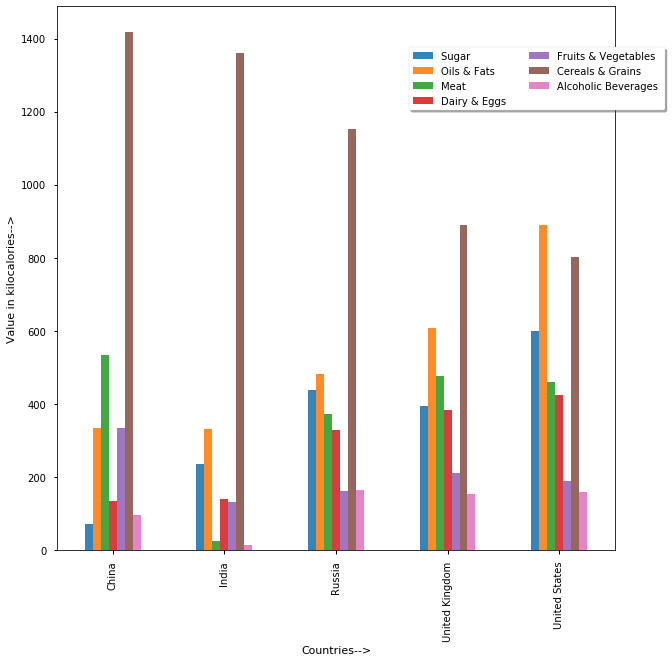

In [31]:
dfdiet.plot.bar(stacked=False, alpha=0.9, figsize=(10,10))
plt.legend(loc='lower center', bbox_to_anchor=(0.86, 0.8), shadow=True, ncol=2)
plt.xlabel('Countries-->')
plt.ylabel('Value in kilocalories-->')
plt.savefig("barchartofdietcomm.png", dpi=300, bbox_inches='tight')

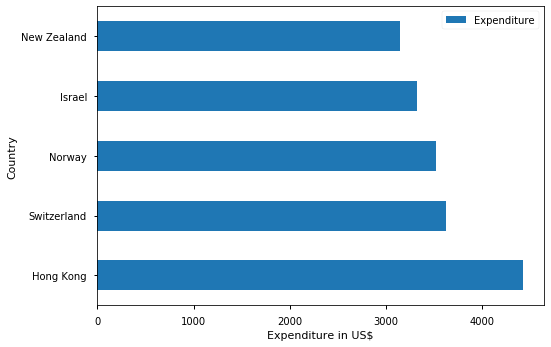

In [76]:
'''FOOD EXPENDITURE'''
foodexp = pd.read_csv("food-expenditure-per-person-per-year.csv")
foodexp = foodexp[(foodexp['Year']==2016)]
foodexp.drop(labels=['Code', 'Year'], axis=1, inplace=True)
foodexp.columns
foodexp.rename(columns={' (US$)' : 'Expenditure'}, inplace=True)

dflarge = foodexp.nlargest(5, 'Expenditure')

dflarge.set_index('Entity', inplace=True)
dflarge.plot.barh()
plt.ylabel('Country')
plt.xlabel('Expenditure in US$')
plt.savefig("foodexpenhighest.png", dpi = 250 , bbox_inches = 'tight')


In [80]:
exp = foodexp[(foodexp['Entity']=='China') | (foodexp['Entity']=='India') | (foodexp['Entity']=='Russia') | (foodexp['Entity']=='United Kingdom') | (foodexp['Entity']=='United States')]

exp.set_index('Entity', inplace=True)


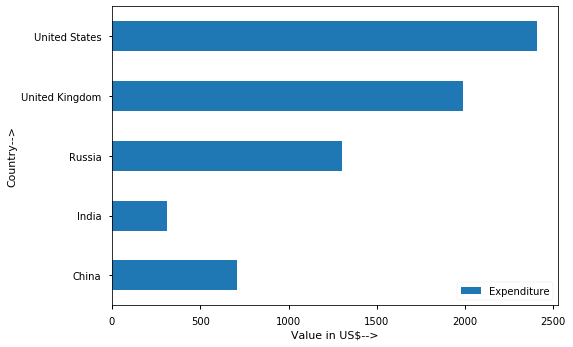

In [82]:
exp.plot.barh()
plt.xlabel('Value in US$-->')
plt.ylabel('Country-->')
plt.savefig("foodexpenditure.png", dpi=250, bbox_inches='tight')

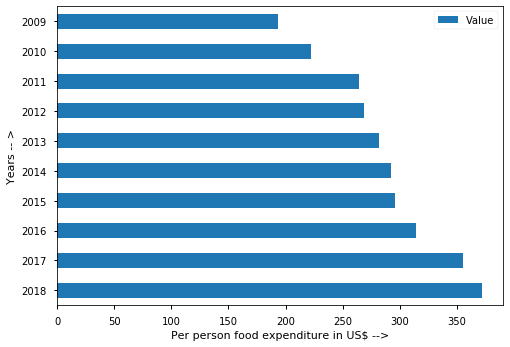

In [90]:
dfindia = pd.read_csv("FoodExpenditureIndia.csv")
dfindia.set_index("Year", inplace=True)
dfindia.plot.barh()
plt.ylabel("Years -- >")
plt.xlabel("Per person food expenditure in US$ -->")
plt.savefig("Indiafoodexp2018.png", dpi=250, bbox_inches='tight')




In [91]:
dfindia.reset_index(inplace=True)
import datetime

dfindia['Year'] = pd.to_datetime(dfindia['Year'], format='%Y')

dfindia.rename(columns={'Year' : 'ds', 'Value' : 'y' }, inplace=True)
dfindia

,ds,y
0,2018-01-01,372.2
1,2017-01-01,355.2
2,2016-01-01,314.5
3,2015-01-01,295.9
4,2014-01-01,292.7
5,2013-01-01,281.9
6,2012-01-01,268.7
7,2011-01-01,264.6
8,2010-01-01,222.0
9,2009-01-01,193.0


In [92]:
from fbprophet import Prophet

m = Prophet()
m.fit(dfindia)

future = m.make_future_dataframe(periods=8 , freq='A', include_history=True)

forecast = m.predict(future)
forecast.tail()


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
13,2021-12-31,159.599055,409.171297,439.512969,159.599050,159.599061,264.058403,264.058403,264.058403,264.058403,264.058403,264.058403,0.0,0.0,0.0,423.657458
14,2022-12-31,177.093600,417.545515,447.695932,177.093593,177.093609,256.775130,256.775130,256.775130,256.775130,256.775130,256.775130,0.0,0.0,0.0,433.868730
15,2023-12-31,194.588145,427.481772,457.506519,194.588135,194.588156,247.815518,247.815518,247.815518,247.815518,247.815518,247.815518,0.0,0.0,0.0,442.403663
16,2024-12-31,212.130620,466.118334,496.873312,212.130607,212.130635,269.653351,269.653351,269.653351,269.653351,269.653351,269.653351,0.0,0.0,0.0,481.783971
17,2025-12-31,229.625165,478.083870,508.610128,229.625149,229.625183,264.058403,264.058403,264.058403,264.058403,264.058403,264.058403,0.0,0.0,0.0,493.683568


In [94]:
dfnew = forecast[['ds', 'yhat']]
dfnew

,ds,yhat
0,2009-01-01,207.085163
1,2010-01-01,225.800239
2,2011-01-01,242.807916
3,2012-01-01,258.108608
4,2013-01-01,277.111279
5,2014-01-01,295.826352
6,2015-01-01,312.834025
7,2016-01-01,328.134718
8,2017-01-01,347.137388
9,2018-01-01,365.852461


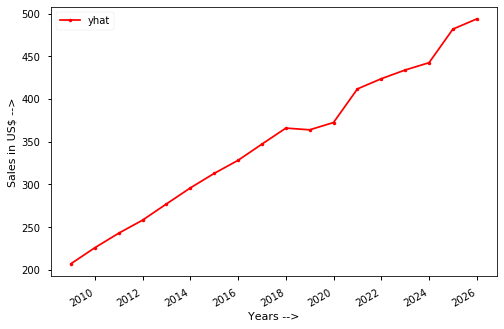

In [95]:
dfnew.plot(kind= 'line', x='ds', y='yhat', color = 'red' , marker = '.' )
plt.xlabel("Years -->")
plt.ylabel("Sales in US$ -->")
plt.savefig("FoodExpenditureindia.png", dpi=240, bbox_inches='tight')

In [32]:
'''Grocery Sales USA '''

grocerydf = pd.read_csv("grocery-sales.csv")

grocerydf['Year'] = grocerydf['Year'].astype(str) 

grocerydf.head()


,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2016,"51,481","51,314","50,886","51,504","51,706","51,995","51,673","51,886","52,109","52,451","52,452","52,564"
1,2017,"52,860","53,164","53,647","53,728","53,850","53,689","53,790","53,981","54,630","54,773","54,882","55,275"
2,2018,"55,021","55,077","55,240","55,545","55,490","55,349","55,716","55,552","55,661","55,835","55,821","55,486"
3,2019,"56,660","55,248","56,334","56,502","56,622","57,005","57,692","57,701","57,220","57,201","57,438","57,622"
4,2020,"57,495","57,337","73,718","63,958",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
df1=pd.melt(grocerydf, id_vars=['Year'], var_name="Month", value_name="Sales") #melt to H df

df1['Month-Year']= df1['Month'] + " " + df1['Year'] #make new column for monthyear
df1['Sales'] = df1['Sales'].str.replace(",", "") #remove all commas
df1['Sales'] = df1['Sales'].astype(float)
df1.head()

,Year,Month,Sales,Month-Year
0,2016,Jan,51481.0,Jan 2016
1,2017,Jan,52860.0,Jan 2017
2,2018,Jan,55021.0,Jan 2018
3,2019,Jan,56660.0,Jan 2019
4,2020,Jan,57495.0,Jan 2020


In [42]:
#Converting month-year to datetime format
import datetime

df1['Month-Year']=pd.to_datetime(df1['Month-Year'], format='%b %Y')

dfdemo = df1[df1['Year'] == '2020']
dfdemo

,Year,Month,Sales,Month-Year
4,2020,Jan,57495.0,2020-01-01
9,2020,Feb,57337.0,2020-02-01
14,2020,Mar,73718.0,2020-03-01
19,2020,Apr,63958.0,2020-04-01
24,2020,May,NaN,2020-05-01
29,2020,Jun,NaN,2020-06-01
34,2020,Jul,NaN,2020-07-01
39,2020,Aug,NaN,2020-08-01
44,2020,Sep,NaN,2020-09-01
49,2020,Oct,NaN,2020-10-01


In [2]:

plt.style.use('seaborn-notebook')

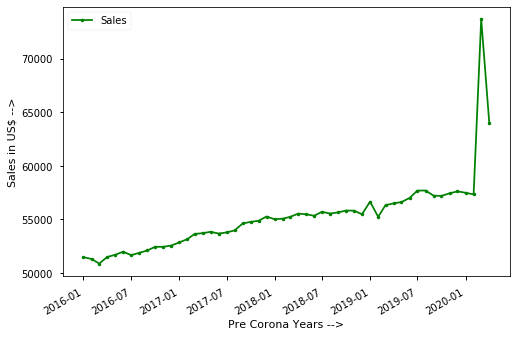

In [36]:
df1.plot(kind= 'line', x='Month-Year', y='Sales', color = 'green' , marker = '.' )
plt.xlabel("Pre Corona Years -->")
plt.ylabel("Sales in US$ -->")
plt.savefig("GrocerySalesUSA.png", dpi=240, bbox_inches='tight')


Importing plotly failed. Interactive plots will not work.


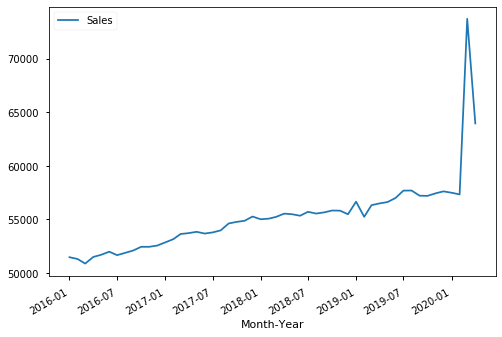

In [43]:
from fbprophet import Prophet
df = df1[['Month-Year', 'Sales']]
df.set_index('Month-Year', inplace=True)
df.plot()

In [46]:
df.reset_index(inplace=True)
df.rename(columns={'Month-Year' : 'ds', 'Sales' : 'y'}, inplace=True)
df

C:\Users\Neha\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,index,ds,y
0,0,2016-01-01,51481.0
1,1,2017-01-01,52860.0
2,2,2018-01-01,55021.0
3,3,2019-01-01,56660.0
4,4,2020-01-01,57495.0
5,5,2016-02-01,51314.0
6,6,2017-02-01,53164.0
7,7,2018-02-01,55077.0
8,8,2019-02-01,55248.0
9,9,2020-02-01,57337.0


In [61]:
m=Prophet()
m.fit(df)

future = m.make_future_dataframe(periods=60, freq='M', include_history = True)

forecast = m.predict(future)

forecast.tail()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
115,2025-07-31,82776.242488,78310.947032,85416.457257,80225.472109,85308.150563,-917.925549,-917.925549,-917.925549,-917.925549,-917.925549,-917.925549,0.0,0.0,0.0,81858.316939
116,2025-08-31,83117.365381,77878.470875,84759.342447,80503.272941,85717.526337,-1860.074250,-1860.074250,-1860.074250,-1860.074250,-1860.074250,-1860.074250,0.0,0.0,0.0,81257.291132
117,2025-09-30,83447.484311,78487.022875,85372.239314,80792.597763,86117.704351,-1715.686857,-1715.686857,-1715.686857,-1715.686857,-1715.686857,-1715.686857,0.0,0.0,0.0,81731.797454
118,2025-10-31,83788.607205,79439.574209,86737.014652,81080.324832,86543.056575,-795.440436,-795.440436,-795.440436,-795.440436,-795.440436,-795.440436,0.0,0.0,0.0,82993.166769
119,2025-11-30,84118.726135,80237.571730,87611.432363,81340.841282,86953.662218,-247.921336,-247.921336,-247.921336,-247.921336,-247.921336,-247.921336,0.0,0.0,0.0,83870.804798


In [62]:
dfnew = forecast[['ds', 'yhat']]
dfnew

,ds,yhat
0,2016-01-01,51207.086140
1,2016-02-01,50896.612756
2,2016-03-01,55448.299220
3,2016-04-01,51940.938105
4,2016-05-01,50857.994797
...,...,...
115,2025-07-31,81858.316939
116,2025-08-31,81257.291132
117,2025-09-30,81731.797454
118,2025-10-31,82993.166769


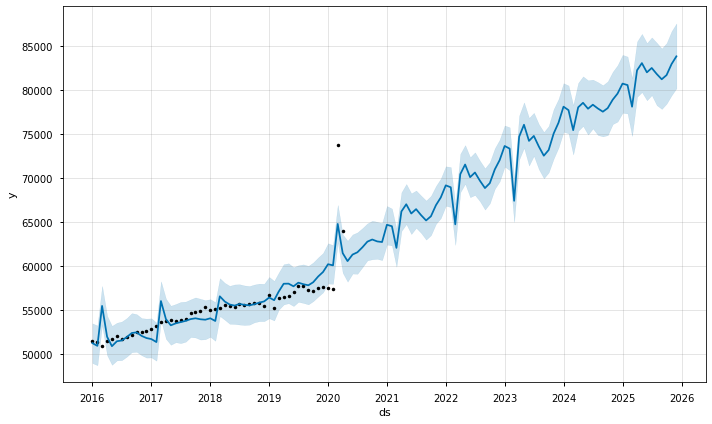

In [66]:
m.plot(forecast)
plt.savefig("fbprophetanal.png", dpi=240, bbox_inches='tight')

In [64]:
dfnew

,ds,yhat
0,2016-01-01,51207.086140
1,2016-02-01,50896.612756
2,2016-03-01,55448.299220
3,2016-04-01,51940.938105
4,2016-05-01,50857.994797
...,...,...
115,2025-07-31,81858.316939
116,2025-08-31,81257.291132
117,2025-09-30,81731.797454
118,2025-10-31,82993.166769


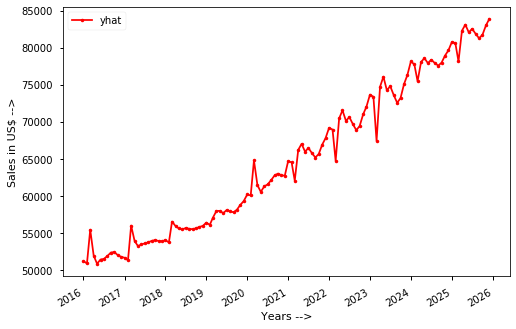

In [65]:
dfnew.plot(kind= 'line', x='ds', y='yhat', color = 'red' , marker = '.' )
plt.xlabel("Years -->")
plt.ylabel("Sales in US$ -->")
plt.savefig("GroceryForecastUSA.png", dpi=240, bbox_inches='tight')

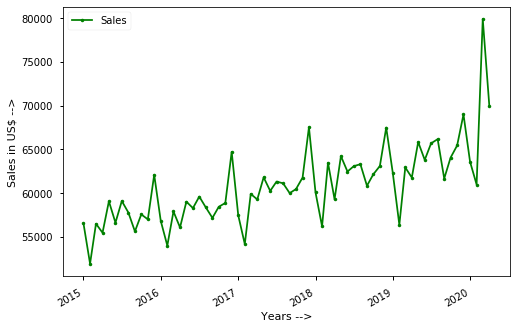

In [69]:
'''FoodBeveragesSales USA'''

foodbevdf = pd.read_csv("FoodBevSales.csv")
foodbevdf['Year'] = foodbevdf['Year'].astype(str)
df2=pd.melt(foodbevdf, id_vars=['Year'], var_name="Month", value_name="Sales")

df2['Month-Year']= df2['Month'] + " " + df2['Year'] 
df2['Sales'] = df2['Sales'].str.replace(",", "") #remove all commas
df2['Sales'] = df2['Sales'].astype(float)

import datetime

df2['Month-Year']=pd.to_datetime(df2['Month-Year'], format='%b %Y')

df2.plot(kind='line', x='Month-Year', y='Sales', color='green', marker='.')
plt.xlabel("Years -->")
plt.ylabel("Sales in US$ -->")
plt.savefig("FoodBevForecastUSA.png", dpi=240, bbox_inches='tight')

C:\Users\Neha\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


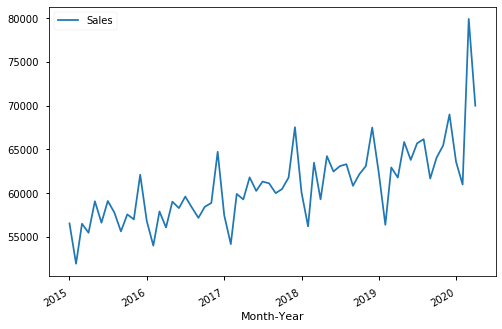

In [70]:
df = df2[['Month-Year', 'Sales']]
df.set_index('Month-Year', inplace=True)
df.plot()

df.reset_index(inplace=True)
df.rename(columns={'Month-Year' : 'ds', 'Sales' : 'y'}, inplace=True)

In [71]:
m=Prophet()
m.fit(df)

future = m.make_future_dataframe(periods=60, freq='M', include_history = True)

forecast = m.predict(future)

forecast.tail()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
127,2025-07-31,91633.429743,88738.772561,96005.176094,88424.338156,94742.972271,738.990970,738.990970,738.990970,738.990970,738.990970,738.990970,0.0,0.0,0.0,92372.420712
128,2025-08-31,91999.387124,84020.259110,91540.138932,88696.971108,95220.716115,-4200.105903,-4200.105903,-4200.105903,-4200.105903,-4200.105903,-4200.105903,0.0,0.0,0.0,87799.281221
129,2025-09-30,92353.539428,87164.065896,95009.757834,88996.062013,95630.828418,-1187.846648,-1187.846648,-1187.846648,-1187.846648,-1187.846648,-1187.846648,0.0,0.0,0.0,91165.692780
130,2025-10-31,92719.496809,88033.060255,96356.423235,89263.029677,96053.011541,-471.316314,-471.316314,-471.316314,-471.316314,-471.316314,-471.316314,0.0,0.0,0.0,92248.180496
131,2025-11-30,93073.649113,92096.326727,100234.418682,89558.502233,96502.005005,3019.874633,3019.874633,3019.874633,3019.874633,3019.874633,3019.874633,0.0,0.0,0.0,96093.523746


In [72]:
dfnew = forecast[['ds', 'yhat']]
dfnew

,ds,yhat
0,2015-01-01,55101.722383
1,2015-02-01,51249.912831
2,2015-03-01,56822.192972
3,2015-04-01,55356.349002
4,2015-05-01,59401.511637
...,...,...
127,2025-07-31,92372.420712
128,2025-08-31,87799.281221
129,2025-09-30,91165.692780
130,2025-10-31,92248.180496


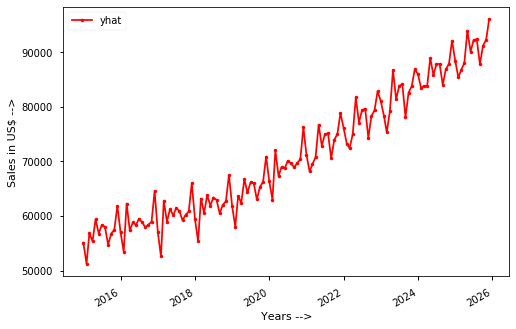

In [73]:
dfnew.plot(kind= 'line', x='ds', y='yhat', color = 'red' , marker = '.' )
plt.xlabel("Years -->")
plt.ylabel("Sales in US$ -->")
plt.savefig("FoodBevForecastUSA.png", dpi=240, bbox_inches='tight')